In [102]:
import seaborn as sns
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, QuantileTransformer
import matplotlib as plt
import numpy as np

In [103]:
df = pd.read_csv('./tecdiv.csv')
df.head()

Timestamp                       Email Address  \
0  1/17/2022 12:45:09       sejal.zambare19@pccoepune.org   
1  1/17/2022 12:45:44    rushikesh.thorat19@pccoepune.org   
2  1/17/2022 12:46:10     atharv.sontakke19@pccoepune.org   
3  1/17/2022 12:46:21     amisha.sherekar19@pccoepune.org   
4  1/17/2022 12:46:31  saurabh.sawardekar19@pccoepune.org   

                      Name                               Email  Roll no   \
0            Sejal Zambare           sejal.zambare19@gmail.com  TECOC359   
1   Rushikesh Vilas Thorat    rushikesh.thorat19@pccoepune.org  TECOC347   
2          Atharv Sontakke         atharv123sontakke@gmail.com  TECOC340   
3    Amisha Sunil Sherekar     amisha.sherekar19@pccoepune.org  TECOC328   
4  Saurabh Raju Sawardekar  saurabh.sawardekar19@pccoepune.org  TECOC326   

     PRN No.  Mobile No.  First year:   Sem 1  First year:   Sem 2  \
0  72026841K  8208217782                 8.40                 8.60   
1  72026776F  9021261925                 8.14                 8.14   
2  72026742M  9009804629                 6.61                 6.61   
3  72026696D  8698227548                 7.20                 7.30   
4  72026682D  7774072850                 7.05                 7.45   

   Second year:   Sem 1  Second year:   Sem 2  
0                  9.80                  9.90  
1                  9.32                  9.82  
2                  9.14                  9.14  
3                  8.90                  9.20  
4                  9.05                  9.40

In [104]:
df.drop(columns=['Timestamp' , 'Email', 'Email Address', 'PRN No.','Mobile No.', 'Name', 'Roll no '], inplace=True)
df

First year:   Sem 1  First year:   Sem 2  Second year:   Sem 1  \
0                  8.40                 8.60                  9.80   
1                  8.14                 8.14                  9.32   
2                  6.61                 6.61                  9.14   
3                  7.20                 7.30                  8.90   
4                  7.05                 7.45                  9.05   
..                  ...                  ...                   ...   
59                 0.00                 0.00                  9.09   
60                 8.31                 8.27                  9.45   
61                 8.31                 8.42                  8.53   
62                 8.70                 8.50                  8.70   
63                 6.90                 7.07                  9.05   

    Second year:   Sem 2  
0                   9.90  
1                   9.82  
2                   9.14  
3                   9.20  
4                   9.40  
..                   ...  
59                  9.36  
60                  9.77  
61                  8.64  
62                  8.80  
63                  9.20  

[64 rows x 4 columns]

In [105]:
df['First year:   Sem 1'].skew()


7.4435891366605444

C:\Users\HP\AppData\Local\Temp\ipykernel_3272\3149260669.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['First year:   Sem 1'], bins = 100, kde=True, palette='YlGnBu')


<AxesSubplot: xlabel='First year:   Sem 1', ylabel='Count'>

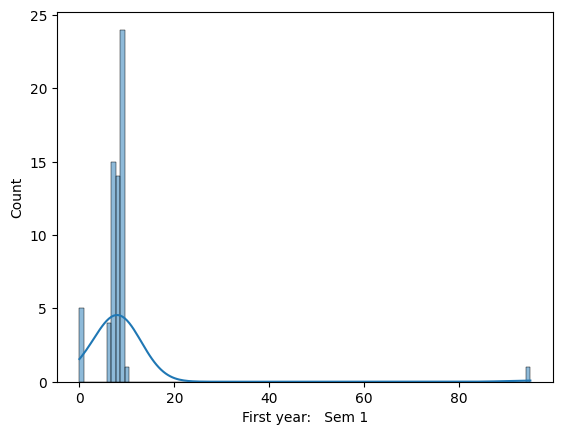

In [106]:
sns.histplot(df['First year:   Sem 1'], bins = 100, kde=True, palette='YlGnBu')

In [107]:
scaler = MinMaxScaler()
scaler = scaler.fit(df)
normalised = scaler.transform(df)

In [108]:
df['First year:   Sem 1'] = normalised[: , 0]
df['First year:   Sem 2'] = normalised[: , 1]
df['Second year:   Sem 1'] = normalised[: , 2]
df['Second year:   Sem 2'] = normalised[: , 3]

In [109]:
df.describe()

First year:   Sem 1  First year:   Sem 2  Second year:   Sem 1  \
count            64.000000            64.000000             64.000000   
mean              0.092992             0.095742              0.794695   
std               0.117767             0.117600              0.175589   
min               0.000000             0.000000              0.000000   
25%               0.076184             0.080579              0.714286   
50%               0.086947             0.088421              0.845515   
75%               0.092658             0.095947              0.911960   
max               1.000000             1.000000              1.000000   

       Second year:   Sem 2  
count             64.000000  
mean               0.791705  
std                0.180067  
min                0.000000  
25%                0.705455  
50%                0.818182  
75%                0.918182  
max                1.000000

In [110]:
pt = PowerTransformer()
qt = QuantileTransformer(n_quantiles=64, output_distribution='normal')
for i in df.columns:
    array = np.array(df[i]).reshape(-1, 1)
    x = qt.fit_transform(array)
    df[i] = x


C:\Users\HP\AppData\Local\Temp\ipykernel_3272\3149260669.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['First year:   Sem 1'], bins = 100, kde=True, palette='YlGnBu')


<AxesSubplot: xlabel='First year:   Sem 1', ylabel='Count'>

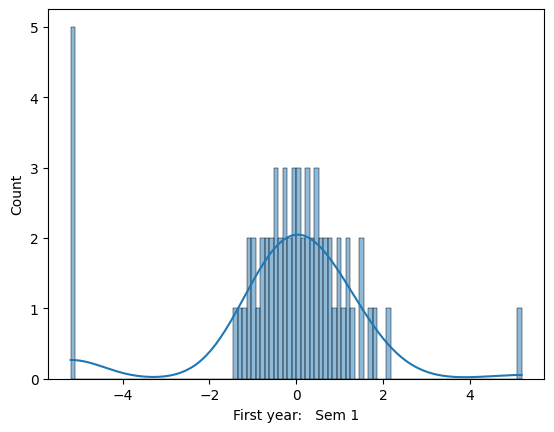

In [111]:
sns.histplot(df['First year:   Sem 1'], bins = 100, kde=True, palette='YlGnBu')